# **Lasso Regression**

1. Supervised Learning Model
2. Regression Model
3. Least Absolute Shrinkage and Selection Operator (LASSO)
4. Implements Regularization (L1) to avoid Overfitting
5. Built on Top of **Linear Regression**

### Regularization

Regularization is used to reduce the overfitting of the model by adding a penalty term $\lambda$ to the model. Lasso Regression uses L1 regularization technique.\
The penalty term reduces the value of the coefficients or eliminate few coefficients, so that the model has fewer coefficients. As the result, overfitting can be avoided.\
The process is called as **Shrinkage**.

### **Cost Function for Lasso Regression**:
$$
J = \frac{1}{m}[\displaystyle\sum_{i=1}^m (Y_i - \hat{Y_i})^2 + \lambda \displaystyle\sum_{j=1}^n w_j]
$$
where,\
m --> Total number of data points\
n --> Total number of input features\
$Y_i$ --> True value\
$\hat{Y_i}$ --> Predicted Value\
$\lambda$ --> Penalty Term\
$w$ --> Weight Parameter of the model

### Gradient Descent

if ($w_j$ > 0):
$$
\frac{\delta J}{\delta w} = \frac{-2}{m} [[\displaystyle\sum_{i=1}^m x_j . (Y_i - \hat{Y_i})] + \lambda]
$$
else:
$$
\frac{\delta J}{\delta w} = \frac{-2}{m} [[\displaystyle\sum_{i=1}^m x_j . (Y_i - \hat{Y_i})] - \lambda]
$$
And,
$$
\frac{\delta J}{\delta b} = \frac{-2}{m} [\displaystyle\sum_{i=1}^m (Y_i - \hat{Y_i})] 
$$

In [1]:
# importing the numpy library
import numpy as np

### **Lasso Regression Class**

In [2]:
class Lasso_Regression():
    # initializinf the hyperparameters
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iteration = no_of_iterations
        self.lambda_parameter = lambda_parameter

    def fit(self,X,Y):
        self.m, self.n = X.shape

        #inititalizing the weights and bias
        self.w = np.zeros(self.n)
        self.b = 0

        self.X = X
        self.Y = Y

        for i in range(self.no_of_iteration):
            self.update_weights()
    
    def update_weights(self):
        # linear equation of the model
        Y_prediction = self.predict(self.X)

        # gradients dw and db
        dw = np.zeros(self.n)
        for i in range(self.n):
            if self.w[i] > 0:
                dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m
            else:
                dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m
        db = -(2*np.sum(self.Y - Y_prediction)) / self.m

        # ypdating the weights and bias
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self,X):
        Y_predict = np.dot(X,self.w) + self.b
        return Y_predict

In [3]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Preprocessing

In [4]:
# loading the data from csv file into a pandas dataframe

salary_data = pd.read_csv('salary_data.csv')

In [5]:
# printing the first five rows of the dataset
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
# number of rows and columns in the dataset

salary_data.shape

(30, 2)

In [7]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the features and targets

In [8]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [9]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [10]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=2)

Training the Lasso Regression Model

In [12]:
model = Lasso_Regression(learning_rate=0.02, no_of_iterations=1000, lambda_parameter=0.01)

In [13]:
model.fit(X_train,Y_train)

In [14]:
# printing the parameter values ( weights and bias )
print('weight = ', model.w)
print('bias = ', model.b)

weight =  [9514.40096808]
bias =  23697.406686212293


Predict the salary value for test data

In [15]:
test_data_prediction = model.predict(X_test)
test_data_prediction

array([ 36066.12794471,  34163.2477511 ,  66512.21104256,  58900.6902681 ,
        91249.65355956,  80783.81249467, 101715.49462444,  52240.60959044,
        42726.20862237,  88395.33326914])

Visualizing the Predicted Values and Actual Value

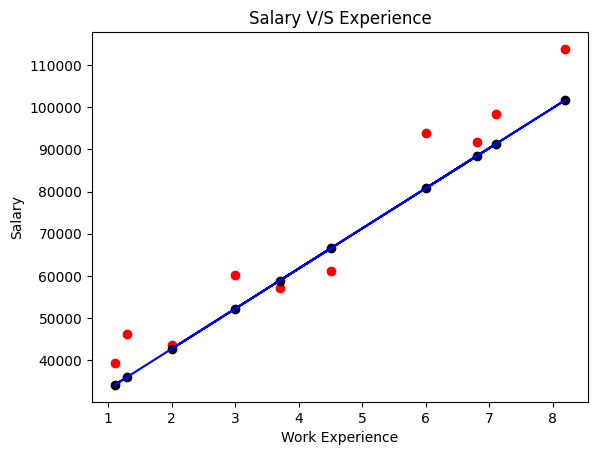

In [16]:
plt.scatter(X_test,Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.scatter(X_test, test_data_prediction, color = 'black')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary V/S Experience')
plt.show()